<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#25940A ;font-family:newtimeroman;color:white;font-size:300%;text-align:center;border-radius:60px 1px;">  Plant Disease Detection  </p>

<div style="width:100%;text-align: center; background-color:#white;"> <img align=middle src="https://static.standard.co.uk/2021/07/26/17/Flowerbox-houseplants-collectionjpg?width=1200&auto=webp&quality=75" alt="Decision Tree" >


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#234D18;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Import libraries
</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#234D18;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Read The Data
</p>
</div>

In [2]:
path = '../input/plantvillage-dataset/color'
train_ds , test_ds = keras.utils.image_dataset_from_directory(
    path ,
    image_size=(224,224),
    batch_size=32 ,
    seed = 123 ,
    validation_split=.2,
    subset='both'
)


Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Using 10861 files for validation.


In [3]:
classes = train_ds.class_names
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#234D18;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
 Visualize Some Images
</p>
</div>

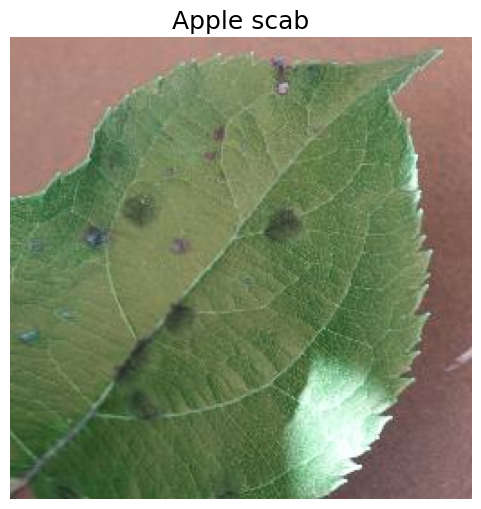

In [4]:
image = cv2.imread("../input/plantvillage-dataset/color/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Apple scab',size =18 )
plt.axis('off')
plt.show()

----------------------------------

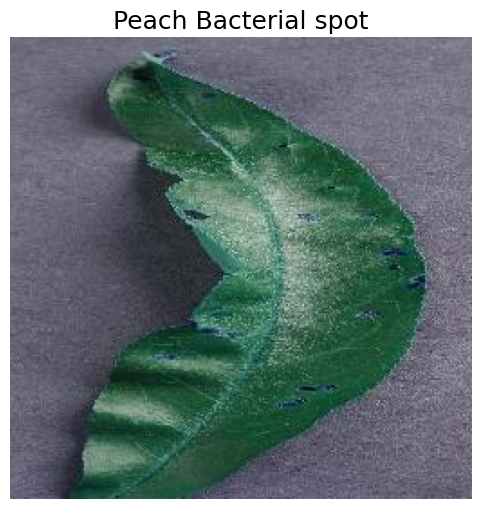

In [5]:
image = cv2.imread("../input/plantvillage-dataset/color/Peach___Bacterial_spot/00e6ad4a-5a62-48d7-ac68-9c0b8ec87f5f___Rut._Bact.S 1472.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Peach Bacterial spot',size =18 )
plt.axis('off')
plt.show()

-----------------------------

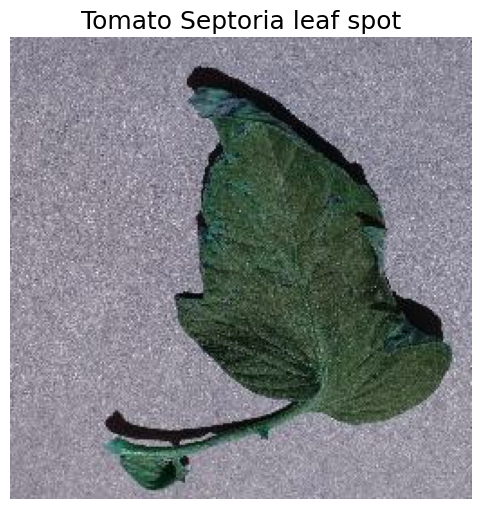

In [6]:
image = cv2.imread("../input/plantvillage-dataset/color/Tomato___Septoria_leaf_spot/015c2613-fb1c-4f31-88f1-c7e5be9ddc97___JR_Sept.L.S 8431.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Tomato Septoria leaf spot',size =18 )
plt.axis('off')
plt.show()

----------------------------------------
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#234D18;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Build Neural network [CNN]
</p>
</div>

In [7]:

model = keras.Sequential([
    keras.layers.Rescaling(scale = 1/255 , input_shape =(224,224,3) ) ,

    keras.layers.Conv2D(32 , (3,3) , activation = 'relu'),
    keras.layers.MaxPool2D((2,2))                     ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,

    # fully connected layers

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(38,activation ='sigmoid')

])

In [8]:
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

-------------------------------
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#234D18;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Train Our Model
</p>
</div>

In [10]:
history = model.fit(train_ds , epochs = 20)

Epoch 1/20


2023-10-28 18:08:54.543153: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1358/1358 [==============================] - 115s 75ms/step - loss: 1.8650 - accuracy: 0.4772
Epoch 2/20
1358/1358 [==============================] - 102s 75ms/step - loss: 0.7316 - accuracy: 0.7710
Epoch 3/20
1358/1358 [==============================] - 101s 75ms/step - loss: 0.4798 - accuracy: 0.8455
Epoch 4/20
1358/1358 [==============================] - 101s 75ms/step - loss: 0.3552 - accuracy: 0.8869
Epoch 5/20
1358/1358 [==============================] - 101s 74ms/step - loss: 0.2861 - accuracy: 0.9060
Epoch 6/20
1358/1358 [==============================] - 101s 74ms/step - loss: 0.2428 - accuracy: 0.9204
Epoch 7/20
1358/1358 [==============================] - 101s 74ms/step - loss: 0.2051 - accuracy: 0.9325
Epoch 8/20
1358/1358 [==============================] - 101s 74ms/step - loss: 0.1804 - accuracy: 0.9392
Epoch 9/20
1358/1358 [==============================] - 101s 74ms/step - loss: 0.1630 - accuracy: 0.9465
Epoch 10/20
1358/1358 [==============================] - 101s 74ms

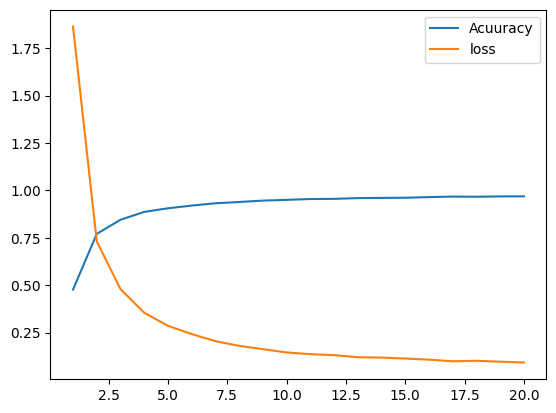

In [11]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,21)

plt.plot(epochs , accuracy , label = 'Acuuracy')
plt.plot(epochs , loss , label = 'loss')
plt.legend()
plt.show()

In [12]:
model.evaluate(test_ds)

340/340 [==============================] - 27s 78ms/step - loss: 0.3340 - accuracy: 0.9086


[0.33403220772743225, 0.9085719585418701]

------------------------------------------
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#234D18;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Test model predictions
</p>
</div>

In [13]:
def img_to_pred(image):
  image = image.numpy()
  image = tf.expand_dims(image,0)
  return image

1/1 [==============================] - 0s 19ms/step


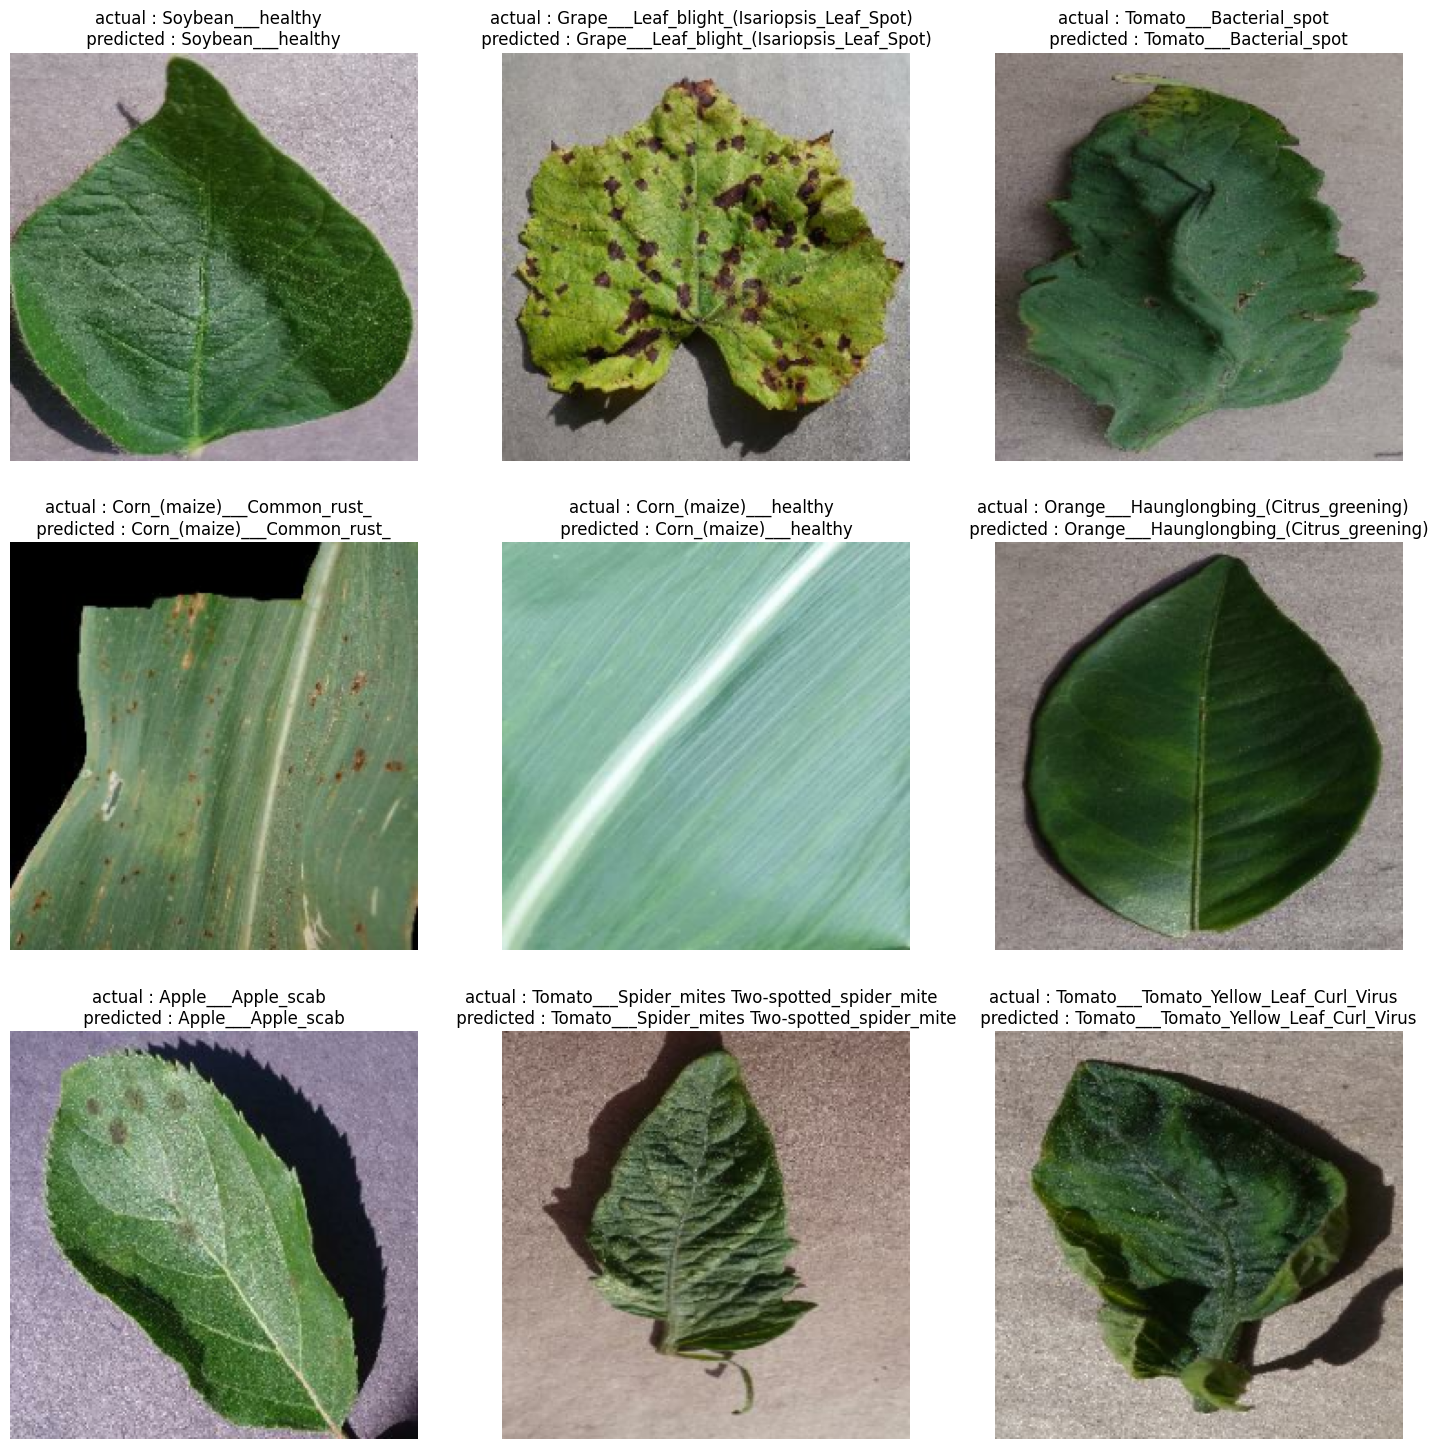

In [14]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1) : # take the first patch
  for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(images[i].numpy().astype('uint32'))
    plt.axis('off')
    actual = classes[labels[i]]
    predict =classes[np.argmax( model.predict(img_to_pred(images[i])))]
    plt.title(f"actual : {actual}  \n predicted : {predict} ")

--------------------------
<p style="padding: 10px;
          color:#25940A ;
          font-size:240%;
          font-family:Serif;
          text-align:center;">   
Thanks For Reading !
</p>